<a href="https://colab.research.google.com/github/doeungim/ADP_DE/blob/main/ADP_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats


#modeling

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm


#
import warnings
warnings.filterwarnings('ignore')

In [76]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem1.csv')
df.head()

# Null 값
null = df.isnull().sum().to_frame().T
null.index = ['NA']

# Unique 값
unique = df.nunique().to_frame().T
unique.index = ['Unique']

display(pd.concat([null, unique], axis = 0))
display(df.head(3))

,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
NA,0,3,0,0,0,0,0,3,0,0,5,0
Unique,2,8,2,5,5,3,4,4,4,5,5,34


,sex,age,Pstatus,Fedu,Medu,guardian,studytime,traveltime,failures,famrel,freetime,absences
0,F,18.0,A,4,4,mother,2,2.0,0,4,3.0,6
1,F,17.0,T,1,1,father,2,1.0,0,5,3.0,4
2,F,15.0,T,1,1,mother,2,1.0,3,4,3.0,10


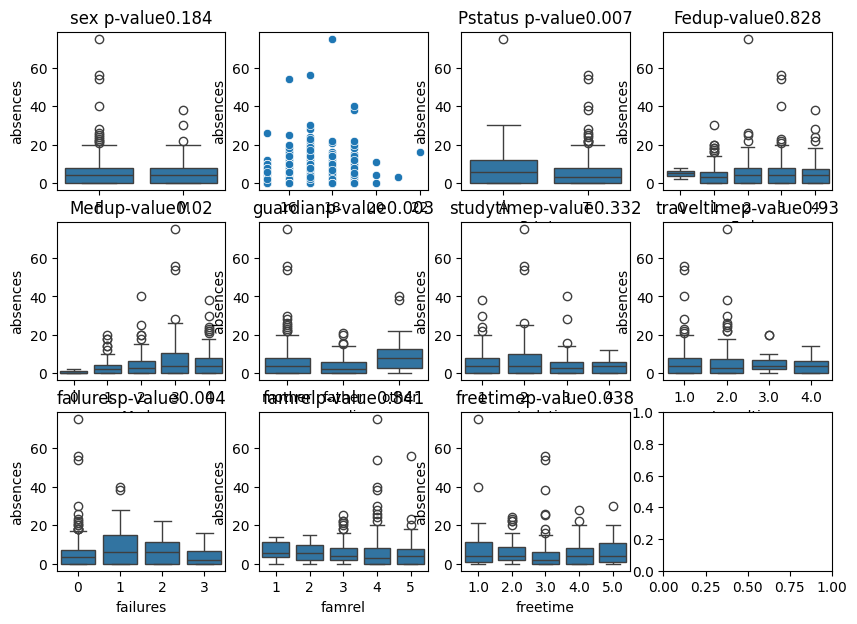

In [77]:
## EDA

# absence 변수를 중심으로, scatter, ttest, anova

fig, axes = plt.subplots(3, 4, figsize = (10,7))

#Absence 를 제외한 11개의 plot

for i, ax in enumerate(axes.flat[:-1]) :

  col_i = df.columns[i]
  target = df[[col_i, 'absences']]

  if col_i == 'age' :
    sns.scatterplot(data = target, x = col_i, y = 'absences', ax = ax)
    corr = round(target.corr().iloc[0,1],3)

  else :
    sns.boxplot(data = target, x = col_i, y = 'absences', ax = ax)
    n_unique = target[col_i].nunique()

    if n_unique == 2 :
      t , p = stats.ttest_ind(target.query(f"{col_i} == '{target[col_i].unique()[0]}'")['absences'] ,  \
                              target.query(f"{col_i} == '{target[col_i].unique()[1]}'")['absences'] )

      p_val = round(p, 3)
      ax.set_title(col_i + " p-value" + f"{p_val}")

    else :
      f, p = stats.f_oneway(* [list(x)[0]  for x in target.groupby([col_i]).agg(list).values])
      f_p_val = round(p, 3)
      ax.set_title(col_i + "p-value" + f"{f_p_val}")

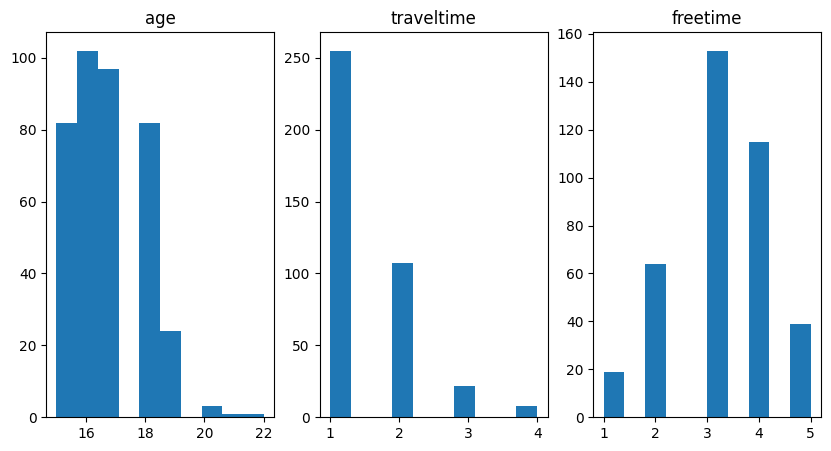

In [82]:
## 결측치가 있는 컬럼만 추출 : age, traveltime, freetime
na_col = df.columns[df.isnull().sum() > 0 ]

fig, axes = plt.subplots(1, 3, figsize = (10,5))

for i, col in enumerate(na_col) :
  axes[i].hist(df[col])
  axes[i].set_title(f'{col}')

In [79]:
na_col = df.columns[df.isnull().sum() > 0 ]
na_col

Index(['age', 'traveltime', 'freetime'], dtype='object')

In [80]:
## 결측치 - 연속형은 평균, 범주형은 최빈값으로
df1 = df.copy()
df1['age'].fillna(df1['age'].mean(), inplace = True)

df1['traveltime'].fillna(df1['traveltime'].mode()[0], inplace = True)

df1['freetime'].fillna(df1['freetime'].mode()[0], inplace = True)

In [133]:
from sklearn.metrics import accuracy_score, mean_squared_error

dum_df = pd.get_dummies(df1, dtype = 'int')

X = dum_df.drop(columns = 'absences')
y = dum_df['absences']

rf = RandomForestRegressor(random_state=2)
lr = LinearRegression()

def modelling(model, name) :
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  acc = mean_squared_error(pred, y_test)

  return {name : acc}, model

## lst 는딕셔너리로 주고
lst = {}
# model_list = 리스트 형태로
model_list = []
for models in ([rf , 'Random_Forest'],
               [lr , 'Linear Regressor']) :

               model = models[0]
               name = models[1]
               acc, model = modelling(model, name)
               lst.update(acc)
               model_list.append(model)

display(pd.DataFrame(lst.items() , columns = ['Model', 'Score']) )

,Model,Score
0,Random_Forest,74.292626
1,Linear Regressor,48.357222


In [134]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv',encoding='cp949')
df.head()

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20


In [143]:
df1 = df.copy()
df1['광고비'] = df1['광고비'].map(lambda x : 1 if x == '높음' else 0 )

x = df1.drop(columns  = '매출액')
y = df1['매출액']

## 다중 회귀 수행
x_ = sm.add_constant(x)
model = sm.OLS(y, x_).fit()


print(model.summary().tables[0])
print(model.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 06 May 2024   Prob (F-statistic):           9.96e-08
Time:                        12:01:25   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1641      0.556     21.876      0.0

생산라인의 12개 제품 평균은 5.7mm이고 표준편차는 0.03, B생산라인의 12개 제품 평균은 5.6mm이고 표준편차는 0.04이다. 5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하라 Z(0.05) = 1.96

In [146]:
# A 생산라인과 B 생산라인의 제품 평균간에는 차이가 없다.
# A 생산라인과 B 생산라인의 제품 평균간에는 차이가 있다.
import numpy as np

m_A = 5.7
sd_A = 0.03

m_B = 5.6
sd_B = 0.04

confa = 0.05
n = 12

# se
se_diff = np.sqrt((sd_A**2/n) + (sd_B**2/n))
diff = m_A - m_B

# t검정
t = (m_A - m_B) / se_diff

# 자유도
df = 2 * n - 2

# p_val : cdf
p_val = 2 * (1 - stats.t.cdf(abs(t), df))
print(p_val)

5.892973662380285e-07


In [150]:
## 양성으로 예측된 사람이 실제 양성일 경우

tp = 370
fn = 15

fp = 10
tn = 690

rate =  0.01

(370 / (370 + 15)) * rate  / ((370 / (370 + 15)) * rate + (10 / (10 + 690)) * (1-rate))

0.4045926735921268

모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간

In [154]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

# 크기
len(data)
# 평균
mean = np.mean(data)
# 분산
std = np.std(data, ddof = 1)
# alpha
alpha = 0.05
# 자유도
df = n - 1

se = std / np.sqrt(n)

# t_critical
t_cri = stats.t.ppf(1 - alpha / 2, df)

# ME
me = t_cri * se
# confi_internval

print(mean - me , mean + me)

3.549033740511627 4.228744037266151


sigma = 0.04인걸 알고 있을때의 95% 신뢰구간

In [157]:
n = len(data)
mean = np.mean(data)
sigma = 0.04
alpha = 0.05

z_critical = stats.norm.ppf(1 - alpha /2)
print(z_critical)

me = z_critical * (sigma / np.sqrt(n))
print(mean-me, mean+me)

1.959963984540054
3.862756035761688 3.9150217420160898
